In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings

In [2]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df1 = df.rename({'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'}, axis =1)

In [5]:
df1.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [7]:
df1.shape

(21, 2)

In [8]:
df1.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

# Check missing value

In [9]:
df1.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

<Axes: >

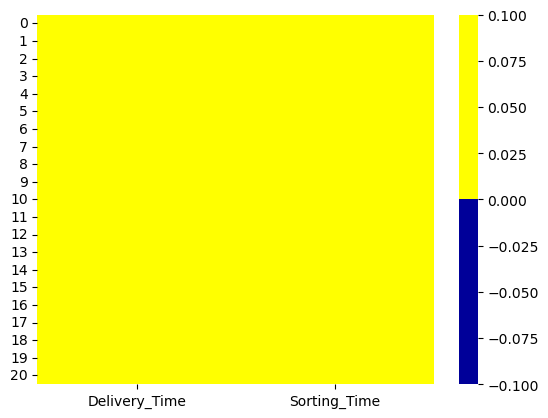

In [10]:
import seaborn as sns
cols = df1.columns
colors = ['#000099', '#ffff00']   
sns.heatmap(df1[cols].isnull(),cmap= sns.color_palette(colors))

# Checking duplicate

In [11]:
df1[df1.duplicated()].shape

(0, 2)

In [12]:
df1.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [13]:
import seaborn as sns

C:\Users\vishal\AppData\Local\Temp\ipykernel_11820\165405591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Delivery_Time'],bins = 10,kde=True)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Before Transformation')

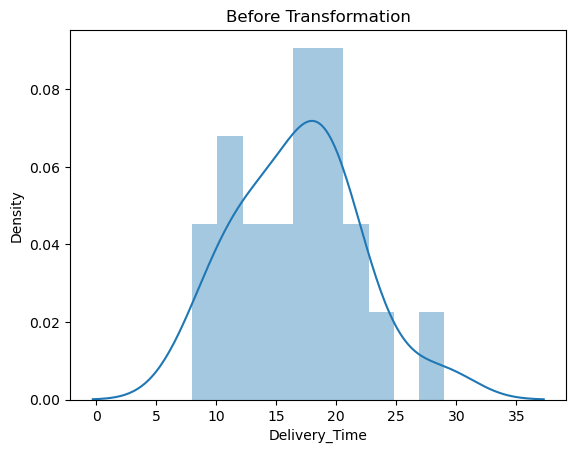

In [14]:
sns.distplot(df1['Delivery_Time'],bins = 10,kde=True)
plt.title('Before Transformation')

C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'After Transformation')

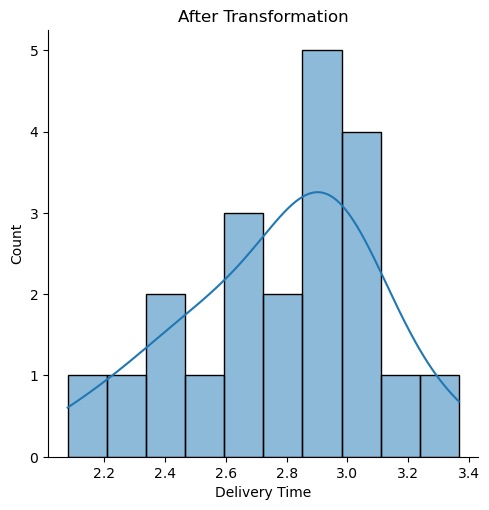

In [15]:
sns.displot(np.log(df['Delivery Time']), bins = 10,kde=True)
plt.title('After Transformation')

C:\Users\vishal\AppData\Local\Temp\ipykernel_11820\996452755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Sorting_Time'],bins = 10,kde=True)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Before Transformation')

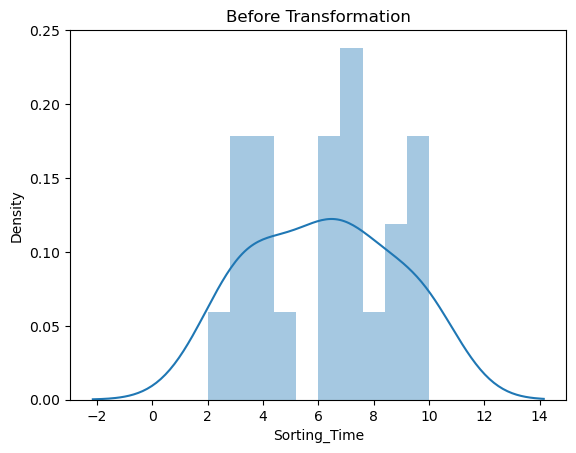

In [16]:
sns.distplot(df1['Sorting_Time'],bins = 10,kde=True)
plt.title('Before Transformation')

In [17]:
import numpy as np

C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'After Transformation')

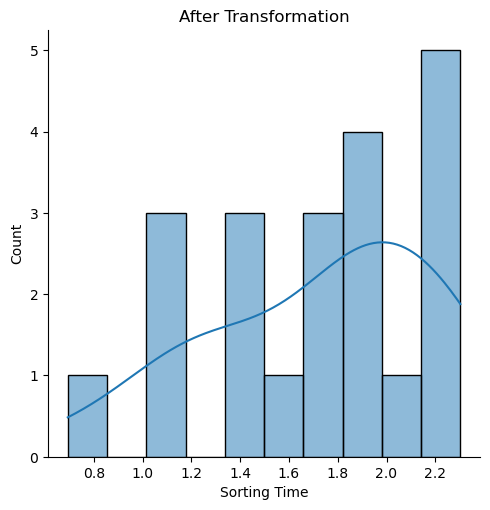

In [18]:
sns.displot(np.log(df['Sorting Time']), bins = 10,kde =True)
plt.title('After Transformation')

C:\Users\vishal\AppData\Local\Temp\ipykernel_11820\595626447.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


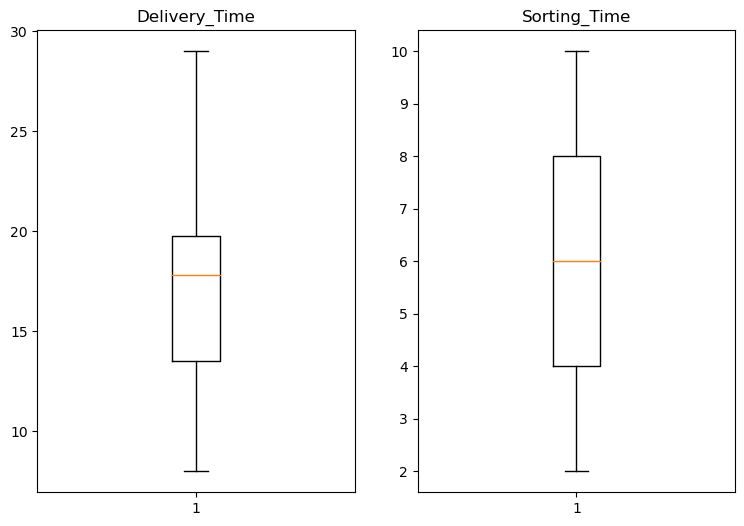

In [19]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df1['Delivery_Time'])
plt.title('Delivery_Time')
plt.subplot(122)
plt.boxplot(df1['Sorting_Time'])
plt.title('Sorting_Time')
plt.show()

C:\Users\vishal\AppData\Local\Temp\ipykernel_11820\3977411279.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Delivery_Time'],bins =10,kde=True)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\AppData\Local\Temp\ipykernel_11820\3977411279.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level func

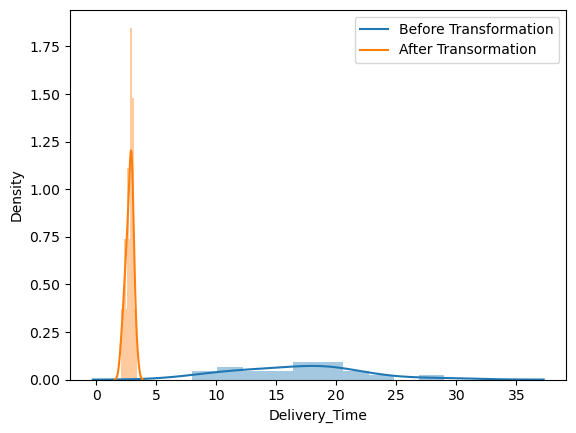

In [20]:
labels=['Before Transformation' , 'After Transormation']
sns.distplot(df1['Delivery_Time'],bins =10,kde=True)
sns.distplot(np.log(df1['Delivery_Time']),bins = 10, kde = True)
plt.legend(labels)
plt.show()

C:\Users\vishal\AppData\Local\Temp\ipykernel_11820\4168893344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Sorting_Time'],bins =10,kde=True)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\AppData\Local\Temp\ipykernel_11820\4168893344.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level funct

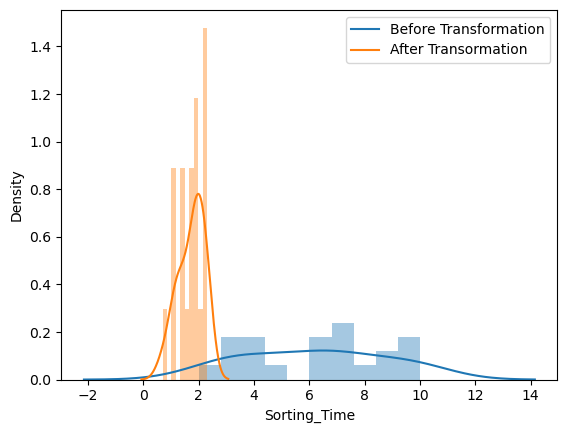

In [21]:
labels=['Before Transformation' , 'After Transormation']
sns.distplot(df1['Sorting_Time'],bins =10,kde=True)
sns.distplot(np.log(df1['Sorting_Time']),bins = 10, kde = True)
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'Log transformation')

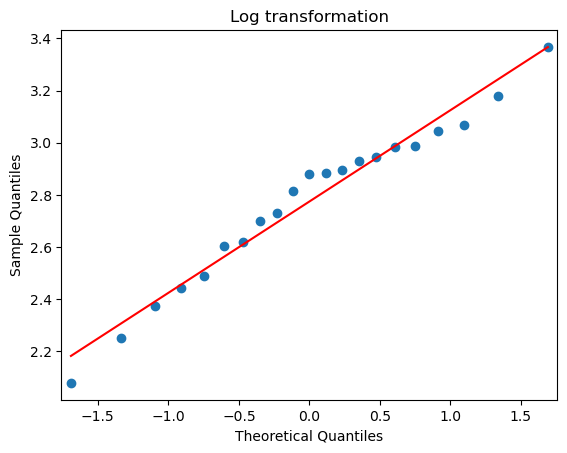

In [22]:
smf.qqplot(np.log(df1['Delivery_Time']), line = 'r')
plt.title('Log transformation')

Text(0.5, 1.0, 'Square root transformation')

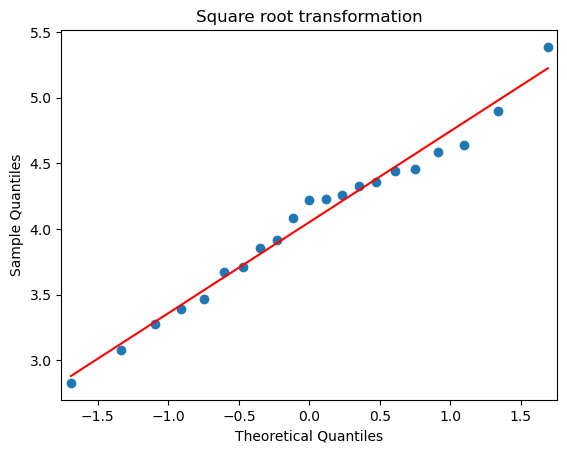

In [23]:
smf.qqplot(np.sqrt(df1['Delivery_Time']), line = 'r')
plt.title('Square root transformation')

Text(0.5, 1.0, 'Log transformation')

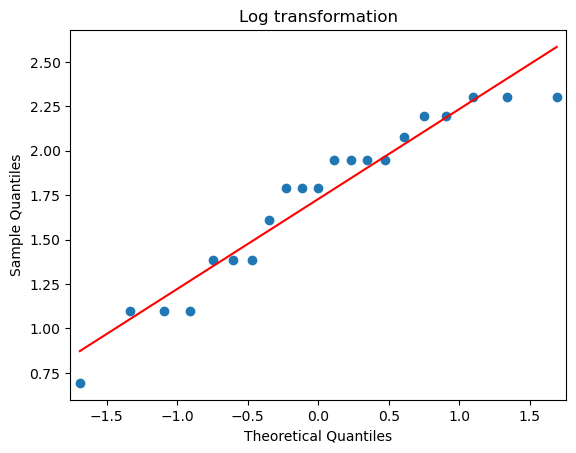

In [24]:
smf.qqplot(np.log(df1['Sorting_Time']), line = 'r')
plt.title('Log transformation')

Text(0.5, 1.0, 'square root transformation')

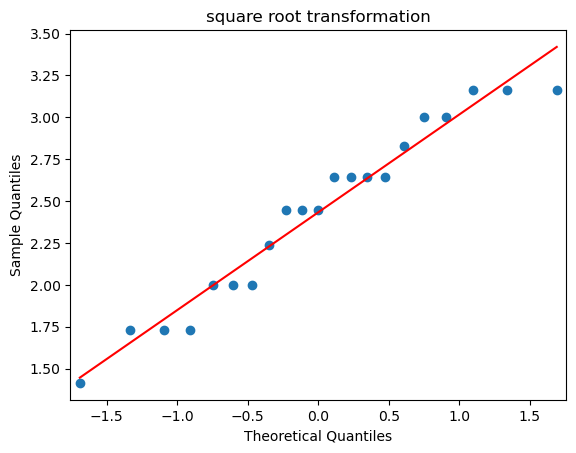

In [25]:
smf.qqplot(np.sqrt(df1['Sorting_Time']), line = 'r')
plt.title('square root transformation')

# Correlation 

In [26]:
df1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


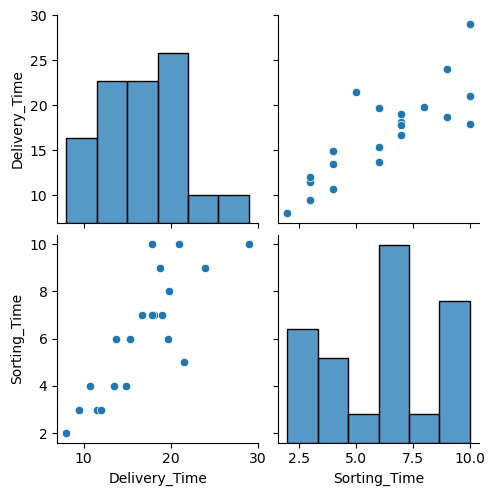

In [27]:
sns.pairplot(df1)

# Fitting a Regression Equation 

In [28]:
import statsmodels.formula.api as smf

In [29]:
model = smf.ols("Delivery_Time~Sorting_Time", data=df1).fit()

# Model Parameter

In [30]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

# T-Values 

In [31]:
print(model.tvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64


# P-Values

In [32]:
print(model.pvalues)

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [33]:
model.rsquared

0.6822714748417231

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

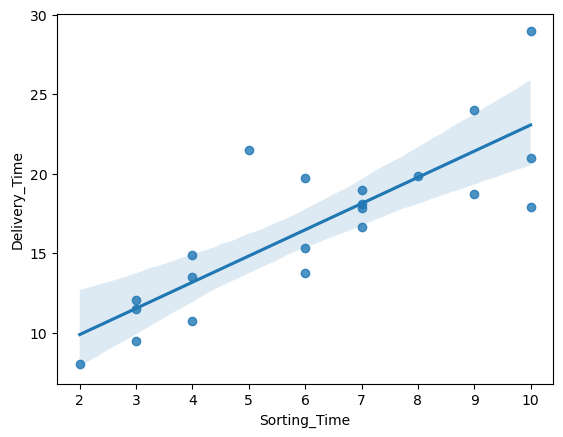

In [34]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time", data=df1)

In [35]:
import statsmodels.formula.api as smf

In [36]:
model = smf.ols("Delivery_Time~Sorting_Time", data=df1).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           3.98e-06
Time:                        17:51:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation 

In [38]:
model1 = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Mon, 08 Apr 2024   Prob (F-statistic):           8.48e-07
Time:                            17:51:06   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation

In [39]:
model2 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 08 Apr 2024   Prob (F-statistic):           1.60e-07
Time:                           17:51:06   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
import statsmodels.api as sm

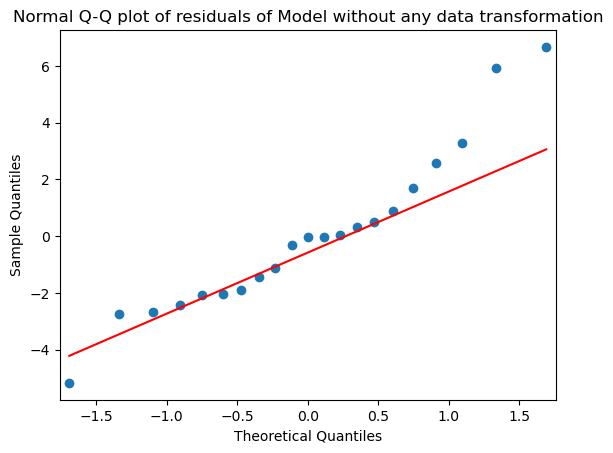

In [41]:
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [42]:
list(np.where(model.resid>6))

[array([20], dtype=int64)]

In [43]:
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Residual plot  Homoscedacity

In [44]:
def standardized(abk):
    return (abk-abk.mean())/abk.std()

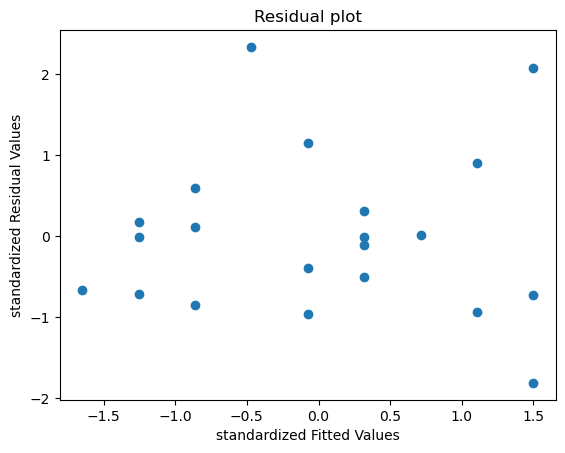

In [45]:
plt.scatter(standardized(model.fittedvalues),standardized(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized Fitted Values')
plt.ylabel('standardized Residual Values')
plt.show() 

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
model1_pred_y =np.square(model1.predict(df1['Sorting_Time']))
model2_pred_y =np.exp(model2.predict(df1['Sorting_Time']))


In [48]:
model1_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model2_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse)


model= 2.9349037688901394 
model1= 2.762294279320867 
model2= 2.7458288976145497


In [49]:
model

# Residual vs Regressors

C:\Users\vishal\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


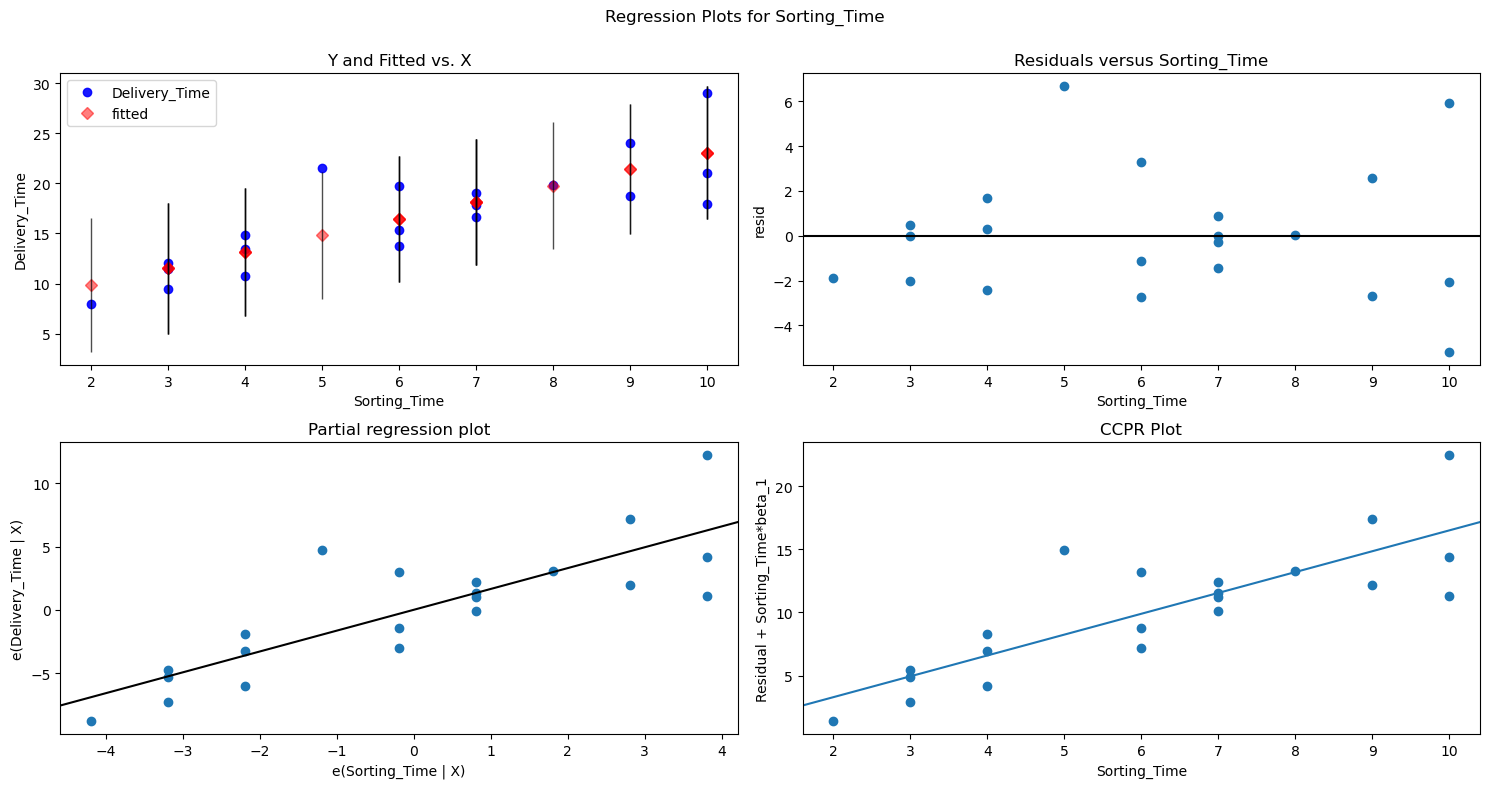

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Sorting_Time", fig=fig)
plt.show()

# Model Deletion by Cook's Distance and Leverage value

In [51]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

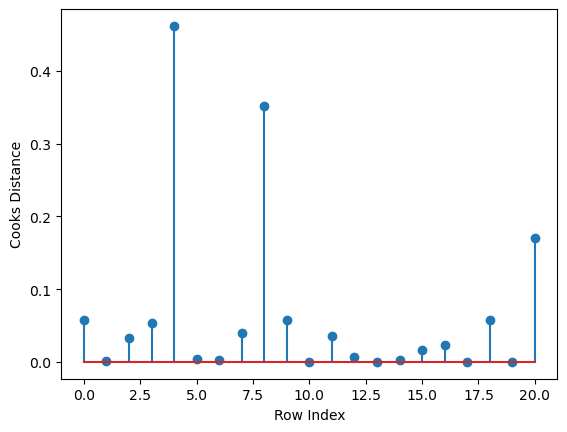

In [52]:
plt.stem(np.arange(len(df1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
(np.argmax(c), np.max(c))

(4, 0.46205304126503155)

In [54]:
from statsmodels.graphics.regressionplots import influence_plot

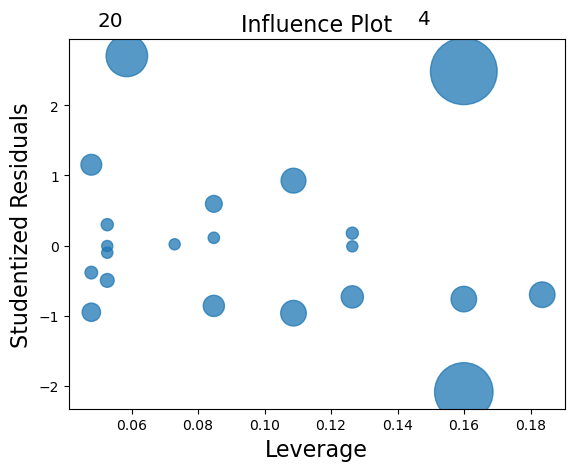

In [55]:
influence_plot(model)
plt.show()

# Prediction

In [56]:
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [57]:
#Predict Delivery Time for Sorting Time = 5, 10
new= pd.Series([5,10])

In [58]:
data_pred = pd.DataFrame(new, columns = ['Sorting_Time'])

In [59]:
data_pred

,Sorting_Time
0,5
1,10


In [60]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64

# End Assignments